In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
df=pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.duplicated().sum()

0

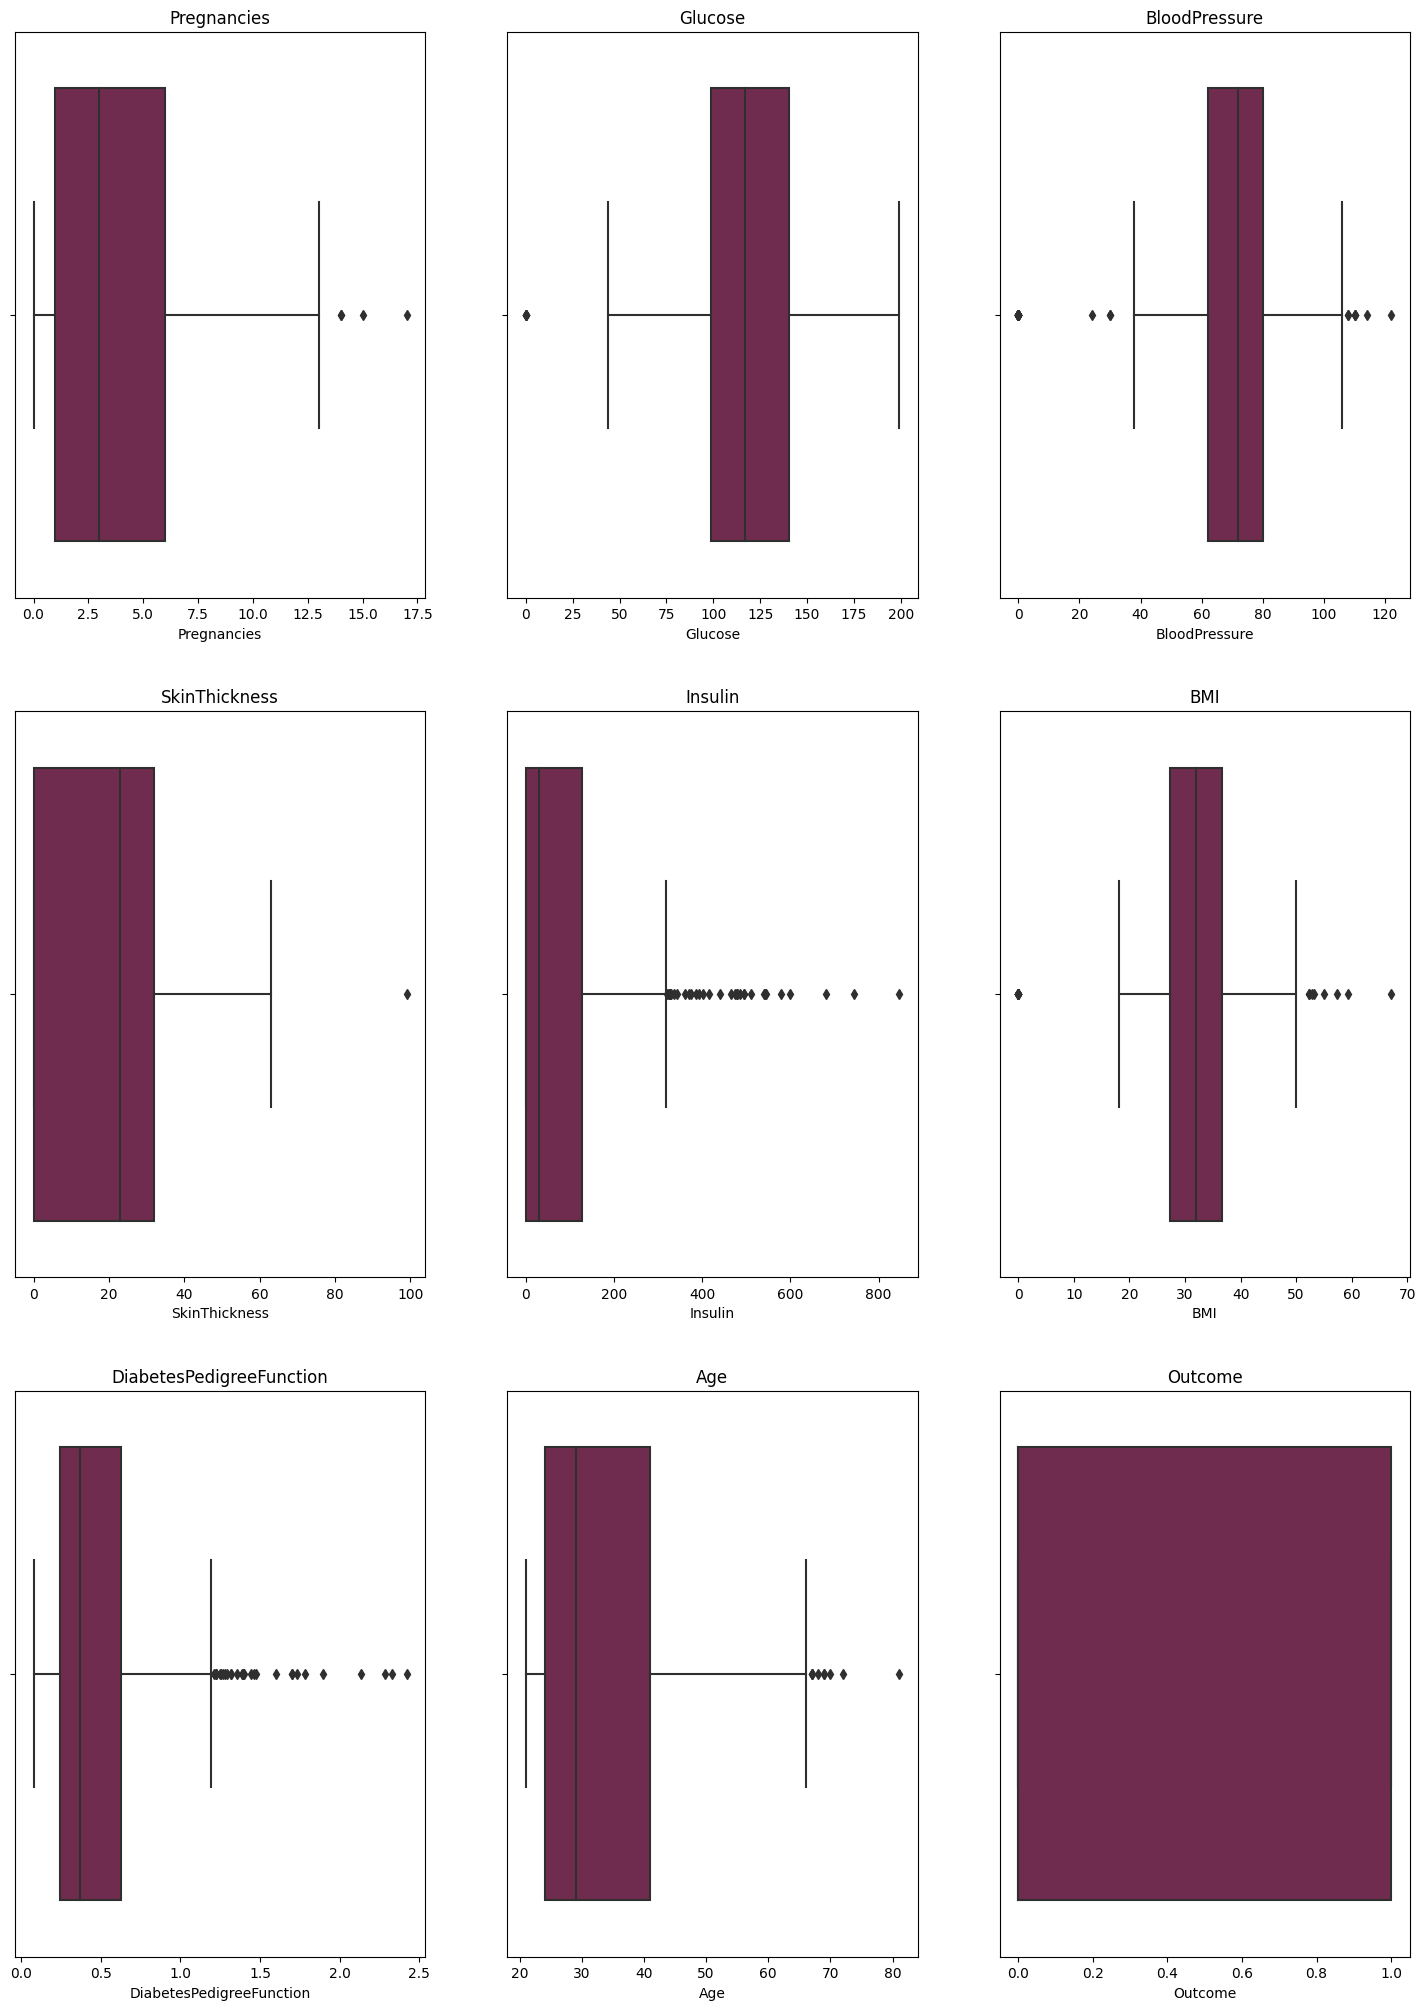

In [6]:
fig, ax = plt.subplots(3,3,figsize=(18,25))
x = df.columns
idx = 0
for i in range(3):
    for j in range(3):
        sns.boxplot(ax=ax[i,j], x=df[x[idx]]
                   ,color=(0.48366628618847957, 0.1286467902201389, 0.31317188565991266))
        ax[i,j].set_title(x[idx])
        idx=idx+1

features are on different ranges so it requires scaling

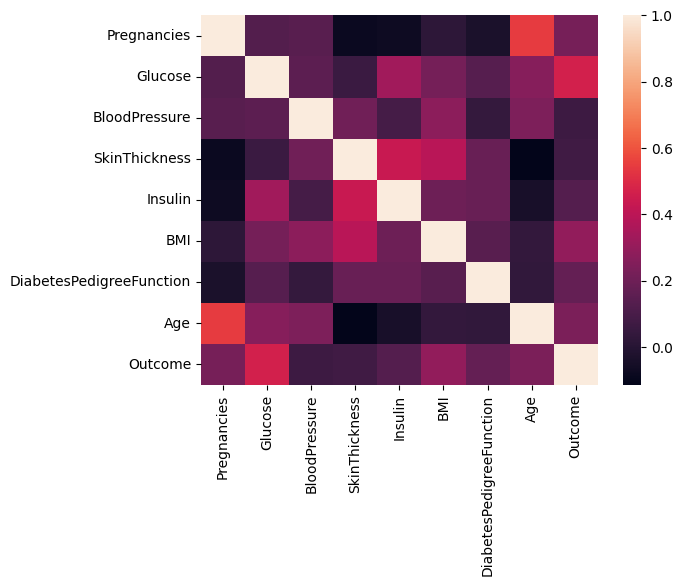

In [7]:
x=df.corr()
sns.heatmap(x)
plt.show()

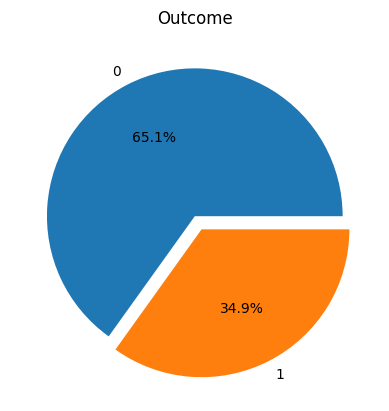

In [8]:
x=df['Outcome'].value_counts()
plt.pie(x,explode=[0, 0.1], autopct='%1.1f%%',labels=[0,1])
plt.title("Outcome")
plt.show()

In [9]:
x=df.columns
for col in x:
    num_zeros=df[col].eq(0).sum()
    print(num_zeros," in ",col)

111  in  Pregnancies
5  in  Glucose
35  in  BloodPressure
227  in  SkinThickness
374  in  Insulin
11  in  BMI
0  in  DiabetesPedigreeFunction
0  in  Age
500  in  Outcome


There are no NaN values in the dataset but there are zereos values which can be considered as a type of missing values in this contest.

In [10]:
def filling_zeroes(df, cols): 
    for col in cols:
        med = df.groupby('Outcome')[col].transform('median')
        zero_mask = df[col] == 0
        df.loc[zero_mask & (df['Outcome'] == 0), col] = med[zero_mask & (df['Outcome'] == 0)]
        df.loc[zero_mask & (df['Outcome'] == 1), col] = med[zero_mask & (df['Outcome'] == 1)]
    return df
df = filling_zeroes(df.copy(), df.columns[1:8])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,39,26.6,0.351,31,0
2,8,183,64,27,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,39,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,27,0,30.1,0.349,47,1


# Modeling

In [11]:
featurs=df.drop('Outcome', axis=1)
target = df['Outcome']

In [12]:
stds=StandardScaler()
x_train,x_test,y_train,y_test =train_test_split(featurs,target,test_size=0.20,random_state=4)

In [13]:
lr = LogisticRegression(random_state=42,max_iter=17000)
pipe_line=make_pipeline(stds,lr)
pipe_line

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=17000, random_state=42))])

In [14]:
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8051948051948052


# Credit:

https://www.kaggle.com/code/doaahelal/pima-indians-diabetes